In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

from qubovert.problems import GraphPartitioning
from qubovert.utils import solve_qubo_bruteforce as qubo_solver


import pulser
from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import DigitalAnalogDevice, MockDevice  
from pulser.waveforms import InterpolatedWaveform, BlackmanWaveform

import sys
sys.path.append('..')

from source.qubo import solve_qubo_bruteforce, plot_distribution, anneal, draw_solutions, evaluate_mapping, get_Q_from_coords, get_register_embedding
from source.qubovert_custom import problem_to_qubo_matrix

In [2]:
edges = {("a", "b"), ("c", "d")}
problem = GraphPartitioning(edges) 
Q = problem.to_qubo()

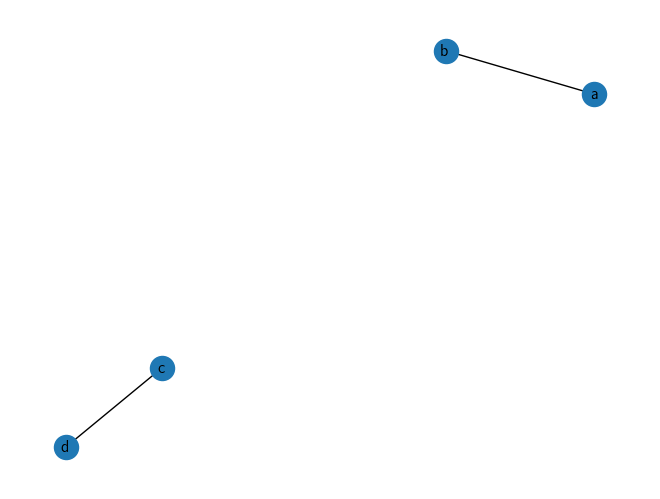

In [3]:
# draw the graph
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()

In [4]:
Q = problem_to_qubo_matrix(problem)
solutions = solve_qubo_bruteforce(Q, n=3)
solutions

[(array([0, 0, 1, 1]), -4.0),
 (array([1, 1, 0, 0]), -4.0),
 (array([0, 0, 0, 1]), -2.0)]

In [35]:
coords, res = get_register_embedding(Q, seed=6, lossf="rmse", device=DigitalAnalogDevice)
res

/home/bigbogo/Documents/Projects/PulserLearn/dev/../source/qubo.py:85: UserWarning: Relative differences between the QUBO matrix and the new matrix are too high: 1.999899582174593
  warnings.warn(f"Relative differences between the QUBO matrix and the new matrix are too high: {np.max(rel_diff)}")
/home/bigbogo/Documents/Projects/PulserLearn/dev/../source/qubo.py:86: UserWarning: differences: 
[[0.         1.99961807 0.05448696 0.0765415 ]
 [1.99961807 0.         1.99683924 1.51145926]
 [0.05448696 1.99683924 0.         1.99989958]
 [0.0765415  1.51145926 1.99989958 0.        ]]
  warnings.warn(f"differences: \n{rel_diff}")


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.3689766737448907
             x: [-1.752e+01 -1.879e+01 -4.000e+01 -1.533e+00 -5.638e+00
                 -1.962e+01 -2.663e+01 -1.103e+01]
           nit: 2064
          nfev: 3058
 final_simplex: (array([[-1.752e+01, -1.879e+01, ..., -2.663e+01,
                        -1.103e+01],
                       [-1.752e+01, -1.879e+01, ..., -2.663e+01,
                        -1.103e+01],
                       ...,
                       [-1.752e+01, -1.879e+01, ..., -2.663e+01,
                        -1.103e+01],
                       [-1.752e+01, -1.879e+01, ..., -2.663e+01,
                        -1.103e+01]]), array([ 1.369e+00,  1.369e+00,  1.369e+00,  1.369e+00,
                        1.369e+00,  1.369e+00,  1.369e+00,  1.369e+00,
                        1.369e+00]))

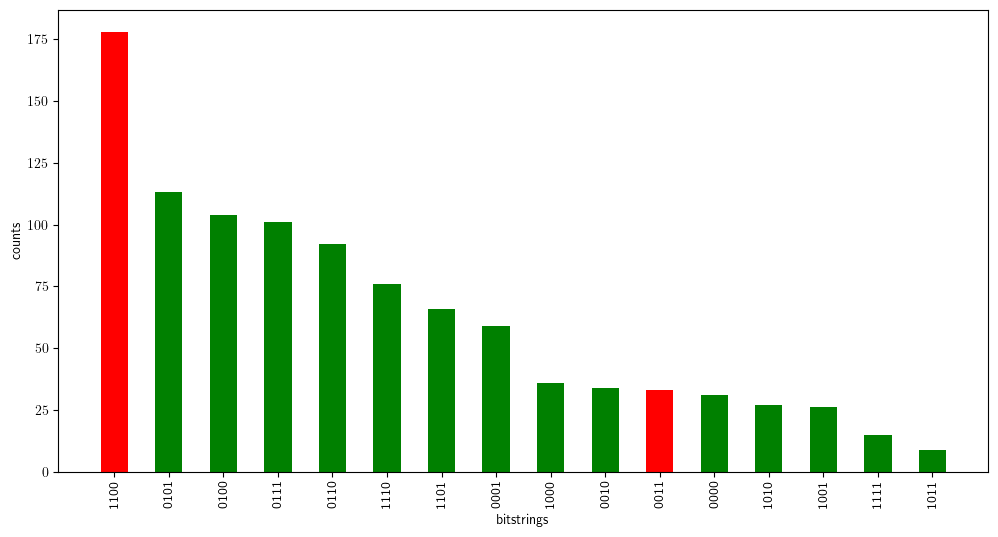

In [44]:
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)
Omega = 2.0
delta_i = -1  # just has to be negative
delta_f = -delta_i  # just has to be positive
T = 6_000  # time in ns, we choose a time long enough to ensure the propagation of information in the system
count_dict = anneal(reg, Omega, delta_i, delta_f, T)

solutions_strs = [''.join(map(str, s[0])) for s in solutions[0:2]]
plot_distribution(count_dict, solutions_strs)

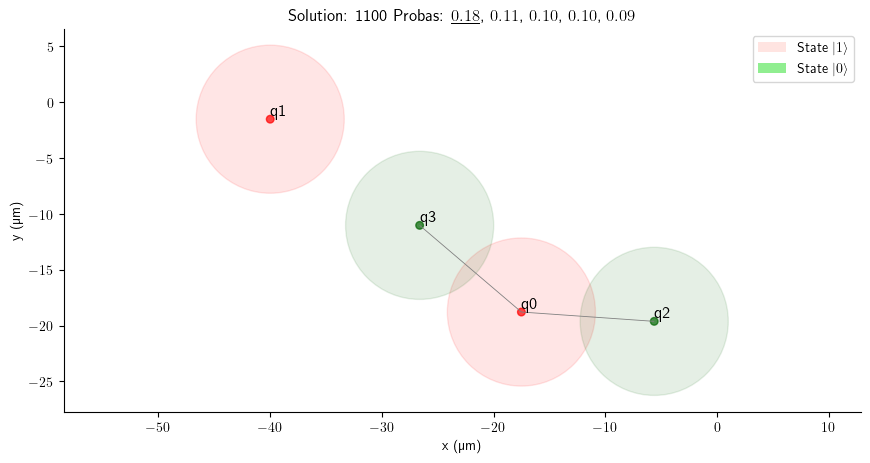

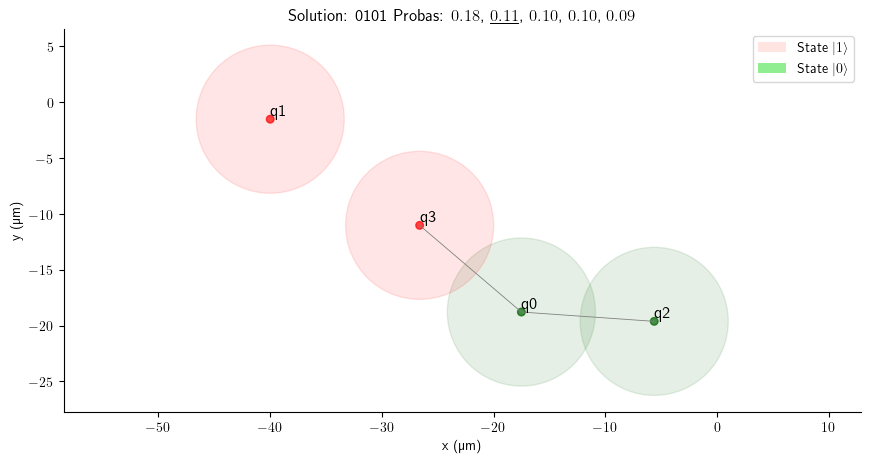

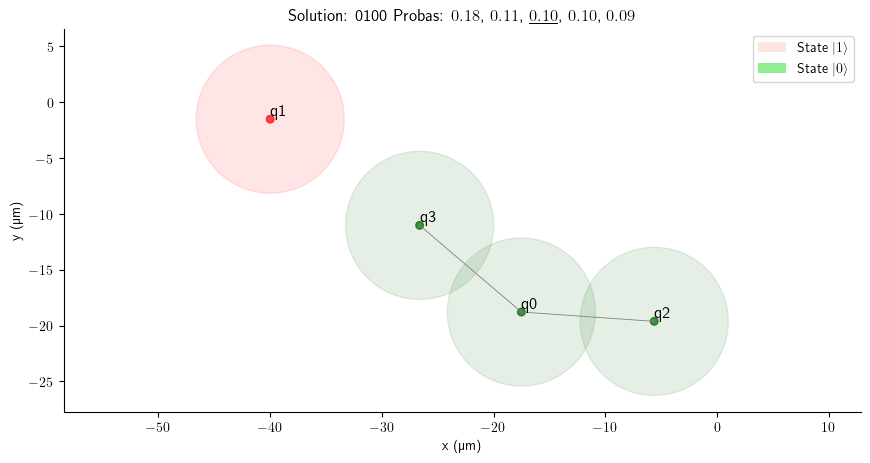

In [45]:
draw_solutions(reg, count_dict, n=3, device=MockDevice, draw_graph=True)